In [36]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pyreadstat
import researchpy as rp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
df, meta= pyreadstat.read_sav('StarbucksFB.sav')
df.head()

,id,comments,shared,liked,picture,link,hashtag,product,ugc,deal,month,dom,dow,elapsed,winter,spring,summer,fall
0,1.0,23.0,112.0,575.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,17.0,3.0,0.0,1.0,0.0,0.0,0.0
1,2.0,63.0,115.0,721.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,17.0,3.0,0.0,1.0,0.0,0.0,0.0
2,3.0,1446.0,1029.0,50265.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,1.0,5.0,1.0,0.0,0.0,0.0
3,4.0,3622.0,1427.0,18291.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,25.0,4.0,3.0,1.0,0.0,0.0,0.0
4,5.0,1566.0,2226.0,31679.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,5.0,1.0,1.0,0.0,0.0,0.0


In [3]:
df.describe().round(2)

,id,comments,shared,liked,picture,link,hashtag,product,ugc,deal,month,dom,dow,elapsed,winter,spring,summer,fall
count,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
mean,50.00,1374.12,2121.05,37127.96,0.79,0.42,0.11,0.38,0.09,0.21,6.28,15.71,4.02,3.72,0.33,0.21,0.16,0.29
std,28.72,2726.57,4334.59,50518.75,0.41,0.50,0.32,0.49,0.29,0.41,4.04,9.00,1.85,3.57,0.47,0.41,0.37,0.46
min,1.00,3.00,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,25.50,172.50,123.50,5794.50,1.00,0.00,0.00,0.00,0.00,0.00,2.50,9.00,3.00,1.00,0.00,0.00,0.00,0.00
50%,50.00,515.00,676.00,18239.00,1.00,0.00,0.00,0.00,0.00,0.00,5.00,14.00,4.00,3.00,0.00,0.00,0.00,0.00
75%,74.50,1384.00,2427.50,48400.50,1.00,1.00,0.00,1.00,0.00,0.00,10.00,24.00,6.00,5.00,1.00,0.00,0.00,1.00
max,99.00,17952.00,30808.00,331310.00,1.00,1.00,1.00,1.00,1.00,1.00,12.00,31.00,7.00,15.00,1.00,1.00,1.00,1.00


In [4]:
def multi_scatter(df, col, array):
    
    for a in range(0, len(array)):        
        plt.subplot()
        plt.scatter(df[array[a]], df[col])
        plt.xlabel(array[a])
        plt.ylabel(col)
        plt.show()

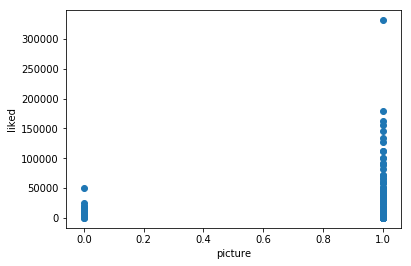

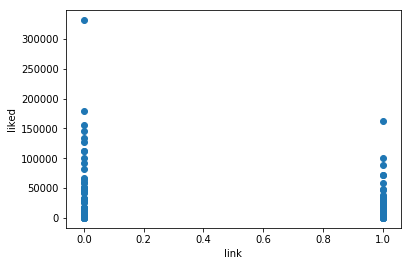

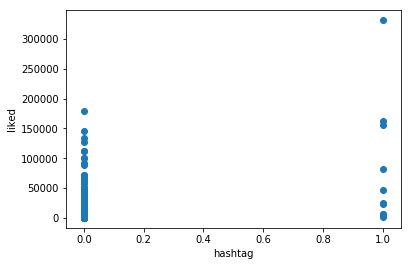

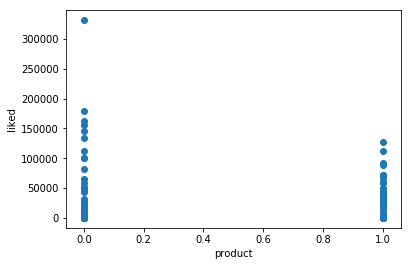

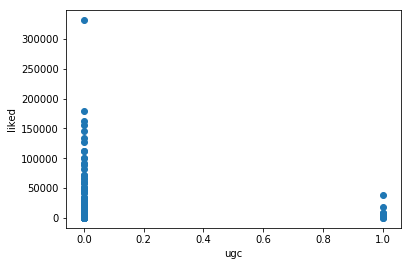

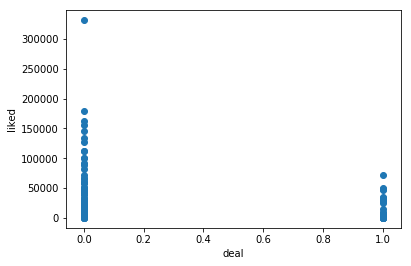

In [5]:
variables= ['picture', 'link', 'hashtag', 'product', 'ugc', 'deal']
multi_scatter(df, 'liked', variables)

In [6]:
X = sm.add_constant(df[variables])
Y = df['liked']
OLS_model = sm.OLS(Y,X)
result = OLS_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  liked   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     3.822
Date:                Tue, 07 Apr 2020   Prob (F-statistic):            0.00190
Time:                        16:34:56   Log-Likelihood:                -1201.1
No. Observations:                  99   AIC:                             2416.
Df Residuals:                      92   BIC:                             2434.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.928e+04   1.23e+04      1.563      0.1

In [7]:
# Check colinearity

table, results= rp.crosstab(df['picture'], df['hashtag'], test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.0680
1,p-value =,0.7943
2,Cramer's phi =,0.0262


In [34]:
# Run the VIP to compare with class exmpale (Regression Analysis - Part 1), not related to the checkup

variables_2= ['picture', 'link', 'hashtag', 'product', 'ugc', 'deal', 'elapsed', 'spring', 'summer', 'fall']
X_2= sm.add_constant(df[variables_2])
vif_2= pd.DataFrame()
vif_2["Features"]= X_2.columns
vif_2["VIF Factor"]= [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif_2.round(3)

,Features,VIF Factor
0,const,8.432
1,picture,1.472
2,link,1.492
3,hashtag,1.217
4,product,1.182
5,ugc,1.432
6,deal,1.523
7,elapsed,1.267
8,spring,1.391
9,summer,1.612


In [35]:
# Get VIF
# VIF (variance Inflation Factor) should be equal to 1 if there is no multi collinearity at all
# VIF < 5 usually indicates multi collinearity is not a serious problem
# For the independent variable with a VIF higher than 5, drop it from the analysis

vif= pd.DataFrame()
vif["Features"]= X.columns
vif["VIF Factor"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif= vif.drop(0)
vif

,Features,VIF Factor
1,picture,1.205692
2,link,1.347163
3,hashtag,1.047505
4,product,1.135704
5,ugc,1.111375
6,deal,1.314742


In [70]:
# Get standardized coefficient (beta)

std= OLS_model.exog.std(axis= 0)    # standardize each column of exog (the predictors), ps. endog is Y
std_y= Y.values.std()
tt= result.t_test(np.diag(std/std_y)[1:])    # ignore the constant
#print(tt.summary(xname= variables, title= 'Standardized Coefficient (beta)'))    # Returns an OLS summary
tt.summary_frame(xname= variables).round(3)    # Returns a dataframe

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.
picture,0.268,0.102,2.617,0.010,0.065,0.471
link,-0.058,0.108,-0.540,0.590,-0.273,0.157
hashtag,0.234,0.095,2.448,0.016,0.044,0.423
product,-0.088,0.099,-0.882,0.380,-0.285,0.110
ugc,-0.140,0.098,-1.419,0.159,-0.335,0.056
deal,-0.156,0.107,-1.454,0.149,-0.368,0.057


In [ ]:
# dir(obj) returns all the attributes
dir(result)